In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import binned_statistic
from rfpimp import plot_corr_heatmap
from sklearn.metrics import confusion_matrix
from gahaco.features.feature_utils import get_data
from gahaco.features.correlation import select_uncorrelated_features

from scipy.stats import spearmanr
from scipy.cluster import hierarchy
from collections import defaultdict

In [7]:
features_df = pd.read_hdf('/cosma7/data/dp004/dc-cues1/tng_dataframes/merged_dataframe.h5')

(array([1.6000e+01, 4.3200e+02, 9.4140e+03, 6.2239e+04, 6.1267e+04,
        4.4542e+04, 2.4480e+04, 4.0680e+03, 5.2400e+02, 2.3000e+01]),
 array([ 6.61247826,  7.25350813,  7.89453799,  8.53556786,  9.17659772,
         9.81762759, 10.45865745, 11.09968732, 11.74071718, 12.38174705,
        13.02277692]),
 <a list of 10 Patch objects>)

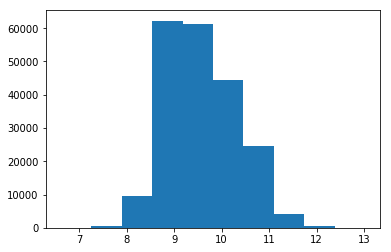

In [14]:
plt.hist(np.log10(features_df.M_stars[features_df.M_stars > 0]))

In [3]:
features_df = features_df.fillna(-9999)
features_df = features_df.replace([-np.inf, np.inf], 0.)

In [4]:
drop_columns = ['ID_DMO', 'ID_HYDRO', 'M200_HYDRO', 'x_dmo', 'y_dmo','z_dmo',
                'total_M_stars','x_hydro', 'y_hydro',
       'z_hydro', 'N_gals', 'M_stars', 'Cnfw']

features_df = features_df.drop(columns=drop_columns)

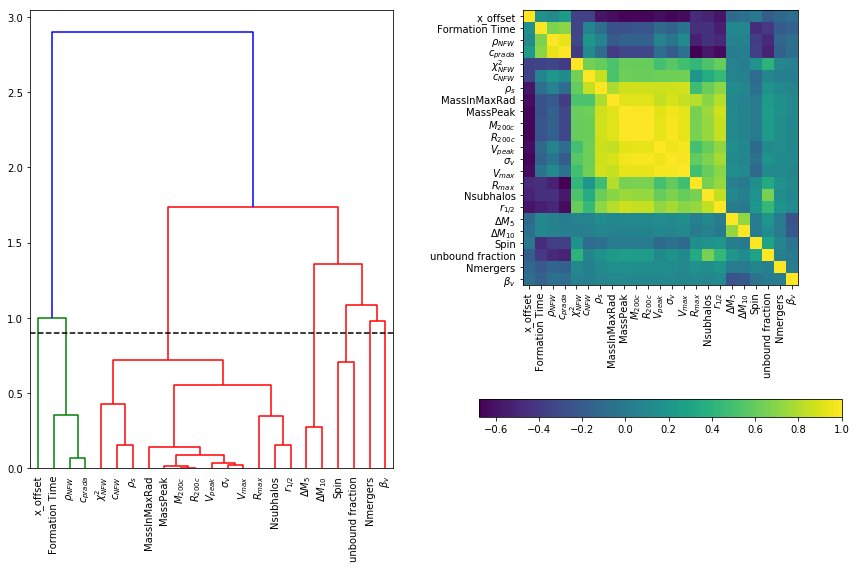

In [5]:
gini_importances = np.loadtxt(f'../models/lightgbm/gini_importances.csv')
uncorrelated_df = select_uncorrelated_features(features_df, gini_importances)

In [18]:
[4] + 3*[1]

[4, 1, 1, 1]

In [20]:
features_df.Nmergers

0         3.0
1         3.0
2         0.0
3         4.0
4         2.0
         ... 
207001    0.0
207002    1.0
207003    4.0
207004    4.0
207005    2.0
Name: Nmergers, Length: 207006, dtype: float64